## Working with netcdf data in R

This notebook shows you how to read the provided climate data in R and produce some sample plots. In this example, we'll be loading and plotting variable `tas`, which is the daily mean temperature. To load a different variable, `tas` will need to be replaced throughout the code with the name of the variable you want to look at.

---


## Reading data from netcdf

First, load the required libraries.

In [2]:
library(ncdf4)                  # needed to read netcdf data
library(ncdf4.helpers)          # additional support functions for netcdf data
library(fields)                 # provides image.plot()
library(rgdal)                  # load shapefiles

Read data from the netcdf into R:

In [3]:
fnm <- "~/UKCP18/day/tas_rcp85_land-rcm_uk_12km_01_day_20201201-20301130.nc"

# open a connection to the netcdf file
nc <- nc_open(fnm)

# read the data into R
tas <- ncvar_get(nc, "tas")

# check the dimensions of your variable. Daily UKCP18 data is stored in arrays of 82 · 112 · 3600, where the dimensions are eastings · northings · date.
dim(tas)

Error in R_nc4_open: No such file or directory


ERROR: Error in nc_open(fnm): Error in nc_open trying to open file ~/UKCP18/day/tas_rcp85_land-rcm_uk_12km_01_day_20201201-20301130.nc


In [4]:
# label the dimensions of your array with the dimensions of the netcdf - this means that you can refer to them by E/N/date
dimnames(tas) <- list("E" = ncvar_get(nc, "projection_x_coordinate"),
                      "N" = ncvar_get(nc, "projection_y_coordinate"),
                      "date" = substr(nc.get.time.series(nc, "tas"),1,10))

# dates are stored as a date-time string: we're only really interested in the date, so we use 'substring' to extract the date only

head(dimnames(tas)$date); tail(dimnames(tas)$date)

[1] "2020-12-01" "2020-12-02" "2020-12-03" "2020-12-04" "2020-12-05"
[6] "2020-12-06"

[1] "2030-11-25" "2030-11-26" "2030-11-27" "2030-11-28" "2030-11-29"
[6] "2030-11-30"

In the UKCP18 data, climate years start in December, to coincide with the start of meteorological winter (Dec, Jan , Feb) and end in Nov, the end of meteorological autumn (Sep, Oct, Nov). Each 'month' in the data has 30 days. One decade of model output therefore contains 3600 daily values. **Because every month in the UKCP18 data has 30 days, packages like `lubridate` can't handle the dates - use substrings of the date to select dates instead!**

When you're finished, close and remove the connection to the netcdf:

In [5]:
nc_close(nc); remove(nc)

Now we have an array `tas` containing ten years of daily model output on an 82 by 112 grid, covering the UK.

---

## Plot a map of the data

The gridded data can be plotted quite easily using `image()`:

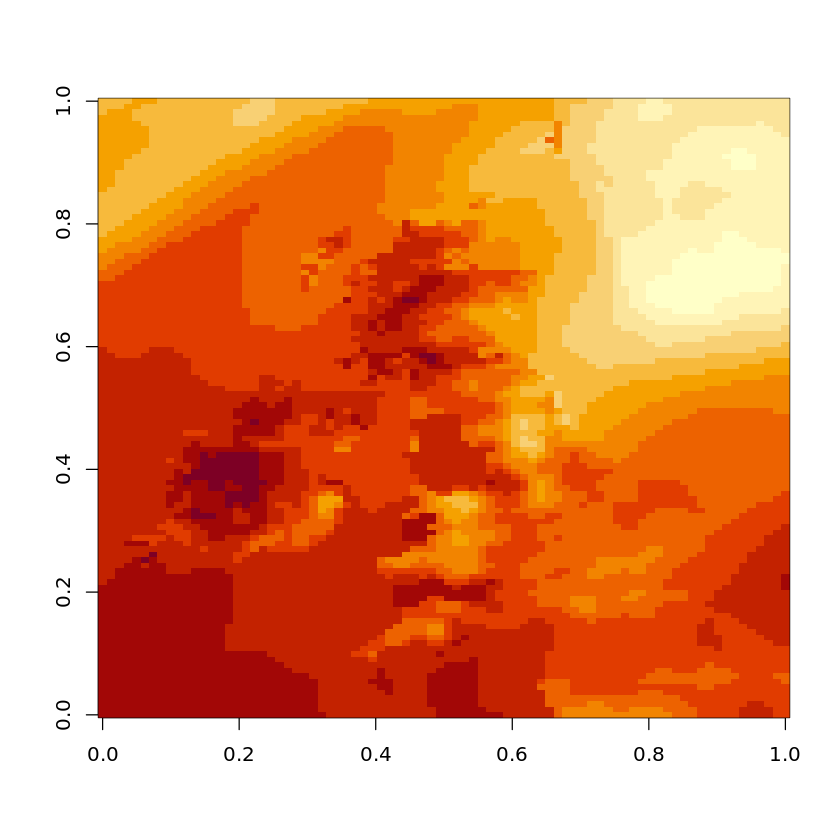

In [99]:
image(tas[,,"2021-06-01"])

But with a couple of minor tweaks, we can make this plot look a bit nicer:

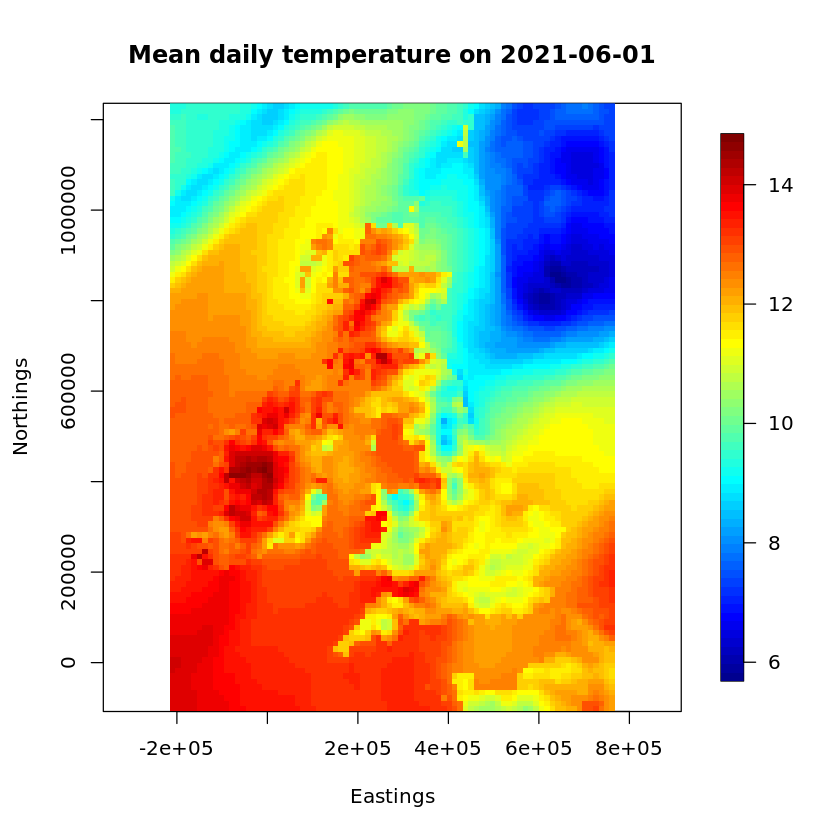

In [111]:
image.plot(x = as.integer(rownames(tas)), y = as.integer(colnames(tas)), tas[,,"2021-06-01"], asp = T, 
           xlab = "Eastings", ylab = "Northings", main = "Mean daily temperature on 2021-06-01")     

# image.plot adds a gradient scale
# adding x and y labels shows where we're looking, and makes it easier to add other layers like maps
# asp = T fixes the aspect ratio so that the grid cells are square

We can also add an outline map of the UK to our plot, using a shapefile.

Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum OSGB_1936 in CRS definition: +proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=400000 +y_0=-100000 +ellps=airy +units=m +no_defs”


OGR data source with driver: ESRI Shapefile 
Source: "/nfsshare/groups/jrole001/geog0121/UKCP18/ukcp-spatial-files/spatial-files/ukcp18-uk-land-country-hires", layer: "ukcp18-uk-land-country-hires"
with 6 features
It has 4 fields


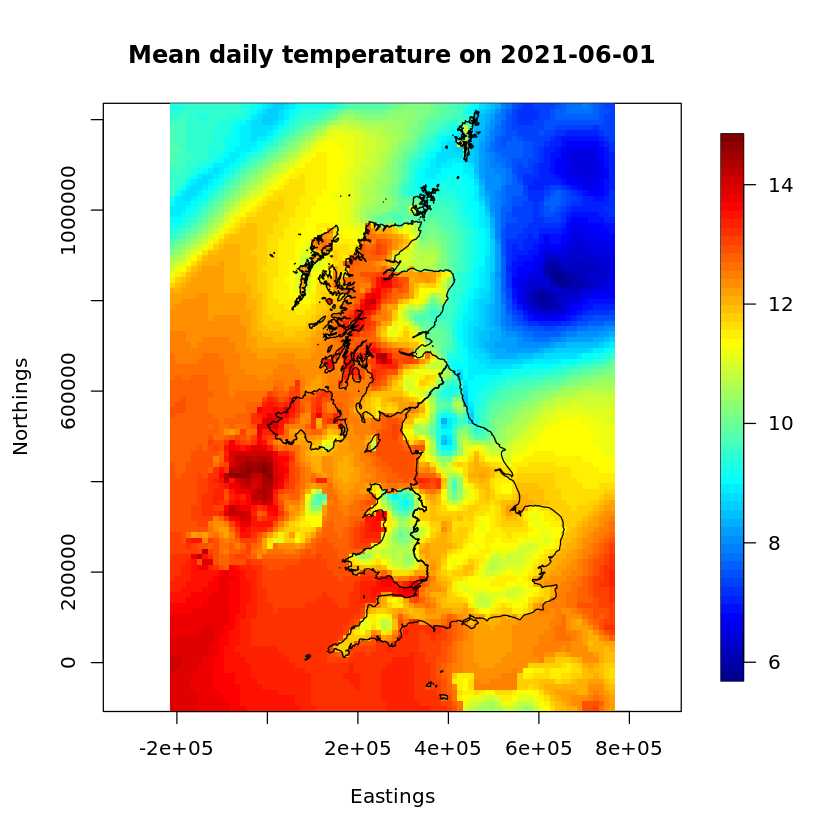

In [114]:
# load the shapefile - this will produce a warning message about a discarded datum, which you can safely ignore
osgbmap <- readOGR("~/UKCP18/ukcp-spatial-files/spatial-files/ukcp18-uk-land-country-hires")

image.plot(x = as.integer(rownames(tas)), y = as.integer(colnames(tas)), tas[,,"2021-06-01"], asp = T, 
           xlab = "Eastings", ylab = "Northings", main = "Mean daily temperature on 2021-06-01")  
sp::plot(osgbmap, add = T)